W projekcie przeanalizowaliśmy zestaw danych zawierający informacje na temat składu, typu i charakterystyki różnych próbek szkła. Skupiliśmy się na znalezieniu zależności pomiędzy składem szkła a jego typem. W tym celu posłużyliśmy się metodami uczenia maszynowego. W tym celu wykorzystaliśmy następujące algorytmy:
- Metoda najbliższych sąsiadów (KNN)
TODO

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("./glass.csv")
print(data.head())
cols = ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


Podstawowe informacje o danych:

In [36]:
print(data.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

Zestaw danych zawiera 214 próbek szkła, które zostały podzielone na 6 klas.
Plik z danymi składa się z informacji o indeksie refrakcji danego typu szkła, składzie szkła (z jakich pierwiastków się składa), oraz typie szkła - jego zastosowaniu.
Szkło jest wykonane w różnym stopniu z następujących pierwiastków: magnezu, aluminium, krzemu, potasu, wapna, baru i żelaza. 
Typy szkła to: przetworzone szkło budowlane typu float (building_windows_float_processed), przetworzone szkło budowlane typu nonfloat (building_windows_non_float_processed),
przetworzone szkło dla pojazdów float (vehicle_windows_float_processed), pojemników (containers), zastawy stołowej (tableware), reflektorów (headlamps). 
Typ oznaczony jako 4 nie występuje w bazie danych.
Każda próbka szkła przyjmuje tylko jedną z 6 klas.
Każda próbka szkła ma 10 atrybutów.

In [67]:
data_count_na = data.isna().sum()
print(data_count_na)

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


W zbiorze danych nie ma brakujących wartości.

<AxesSubplot:>

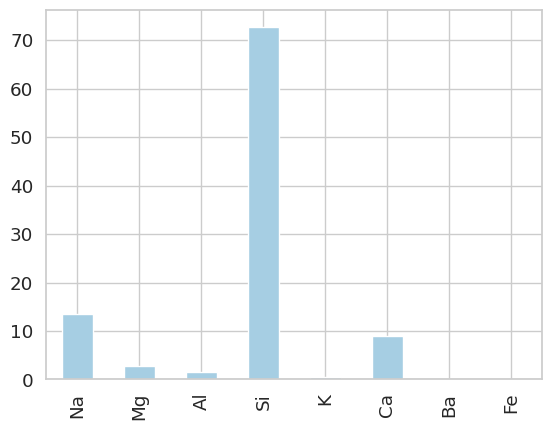

In [66]:
#Wykres zawartości poszczególnych pierwiastków

data_mean = data.drop(columns=["Type", "RI"],axis = 1)
data_mean = data_mean.mean()
data_mean.plot.bar()

Na powyższym wykresie przedstawiono średnią zawartość poszczególnych pierwiastków w szkłach.

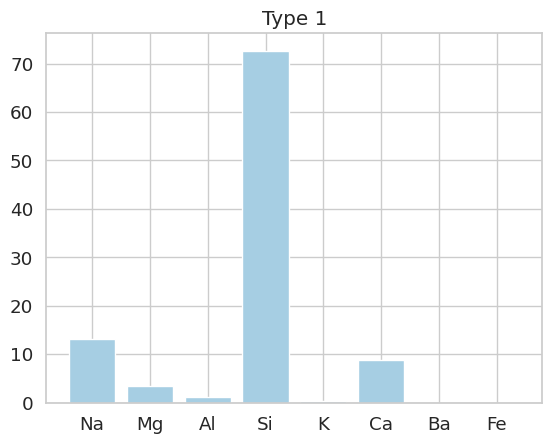

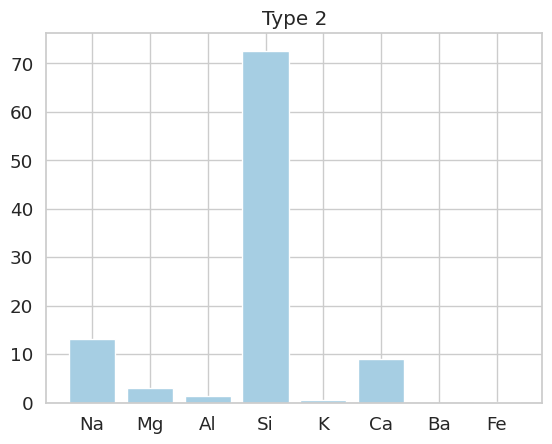

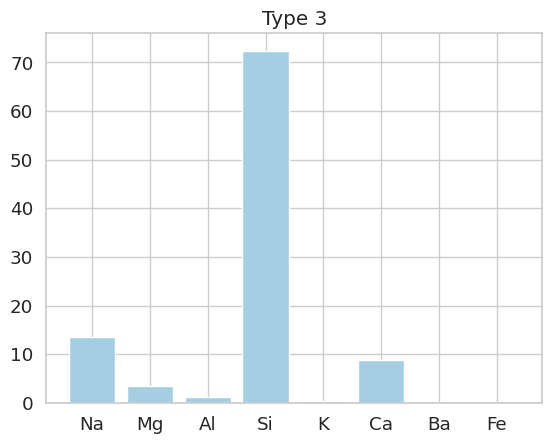

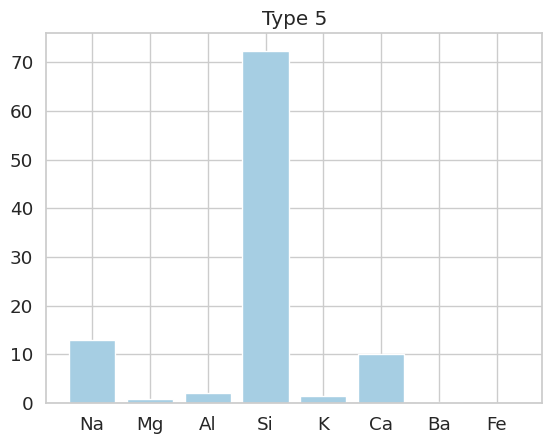

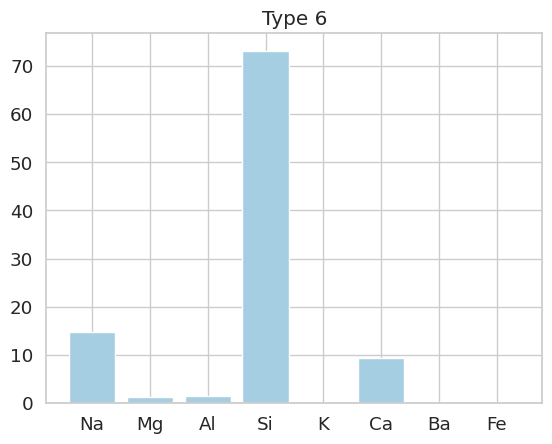

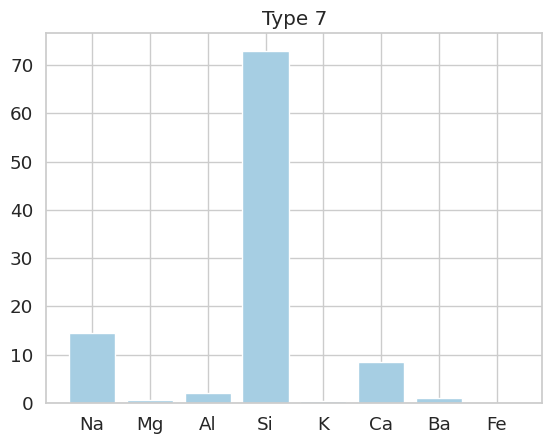

In [68]:
#Zawartość poszczególnych pierwiastków różnych typach szkła
data1 = data.drop(columns=["RI"],axis = 1)
x_values = ["Na","Mg","Al","Si","K","Ca","Ba","Fe"]
types = [1,2,3,5,6,7]
for i in types:
    data_plot = data1.loc[data['Type'] == i]
    data_plot = data_plot.drop(columns=["Type"],axis = 1)
    data_plot = data_plot.mean()
    y_values = data_plot.tolist()
    plt.title(f'Type {i}')
    plt.bar(x_values,y_values)
    plt.show()
#    data_plot.plot.bar()


Na powyższym wykresie przedstawiono średnią zawartość poszczególnych pierwiastków w typach szkła.

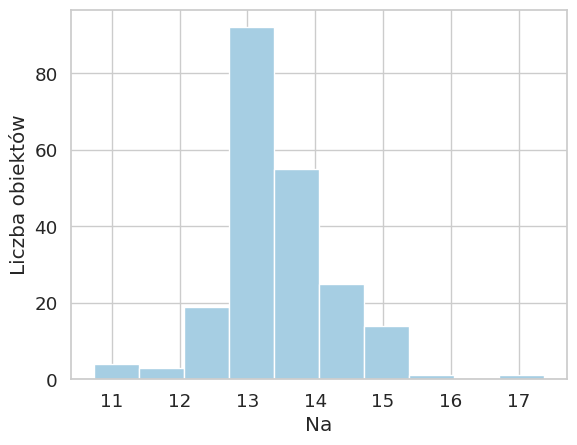

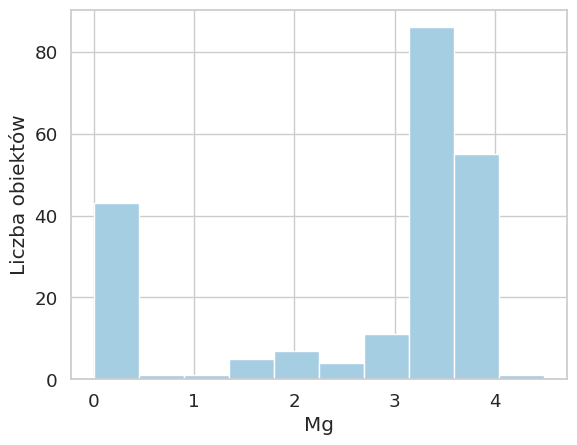

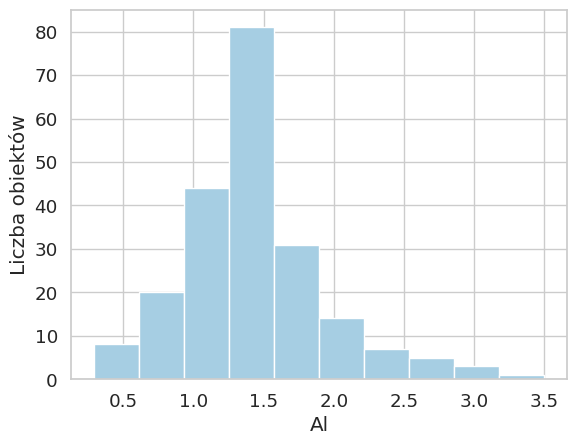

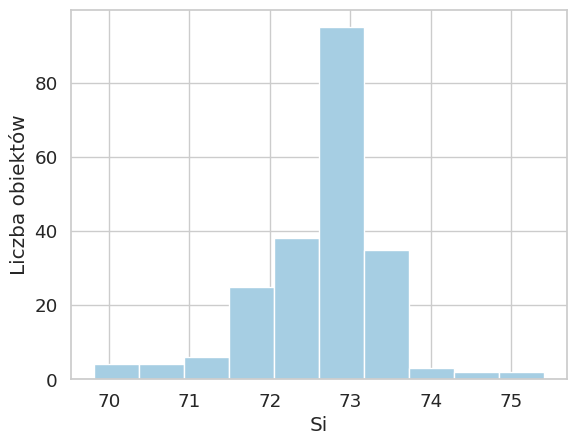

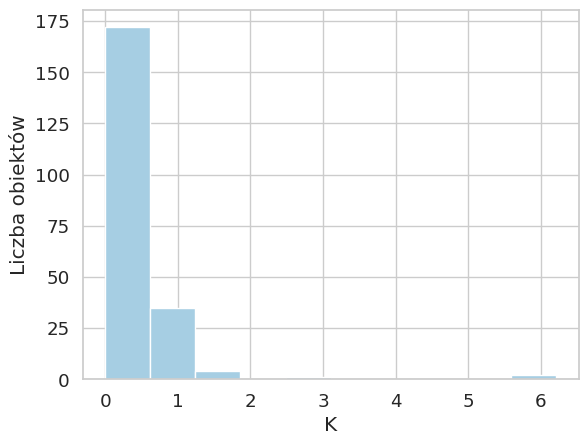

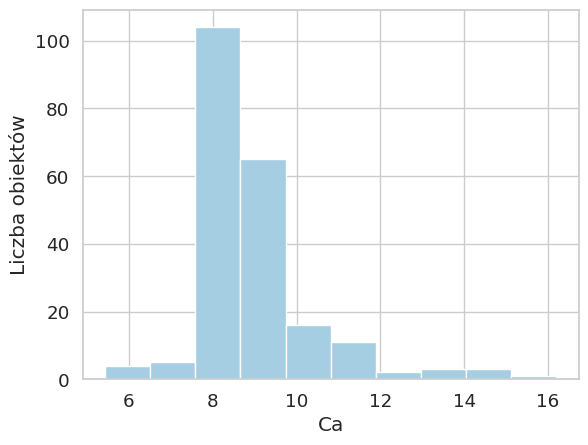

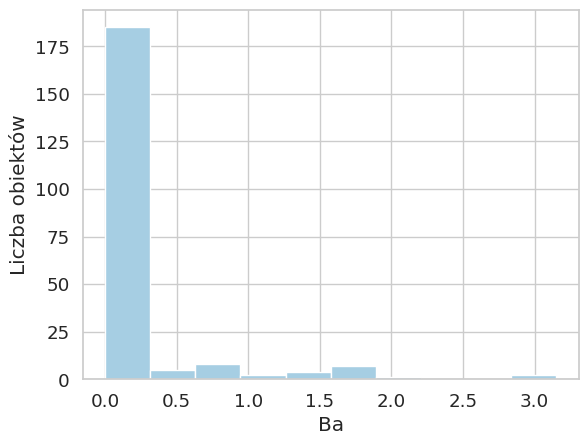

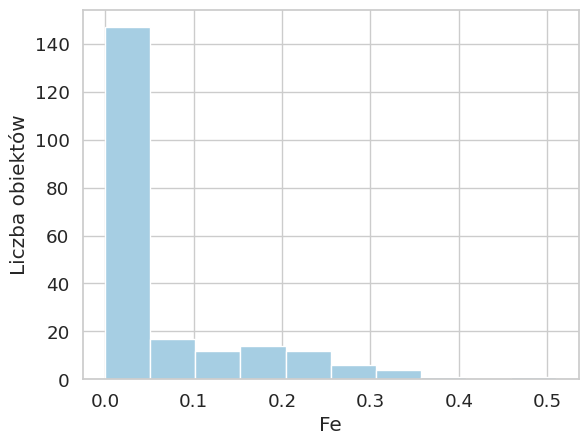

In [ ]:
#Liczba obiektów o poszczególnej zawartości 
for i in data[x_values].columns:
    plt.hist(data[x_values][i])
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('Liczba obiektów')
    plt.show()

Na powyższym wykresie przedstawiono rozkład zawartości pierwiastków w całym zbiorze danych.

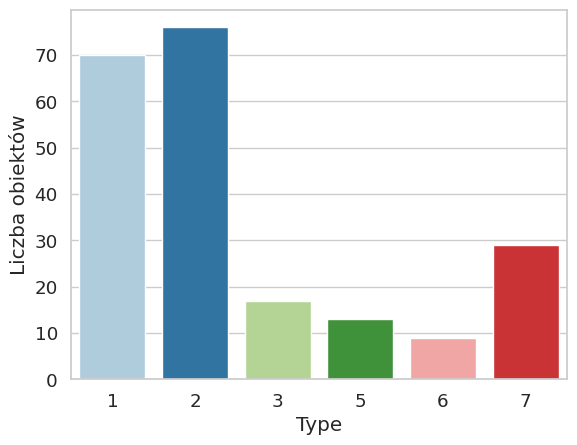

In [ ]:
for i in data[['Type']].columns:
    sns.barplot(x=data[['Type']][i].value_counts().index,y=data[['Type']][i].value_counts())
    plt.xlabel(i)
    plt.ylabel('Liczba obiektów')
    plt.show()

Na powyższym wykresie przedstawiono ilość próbek szkła w poszczególnych typach.

<AxesSubplot:>

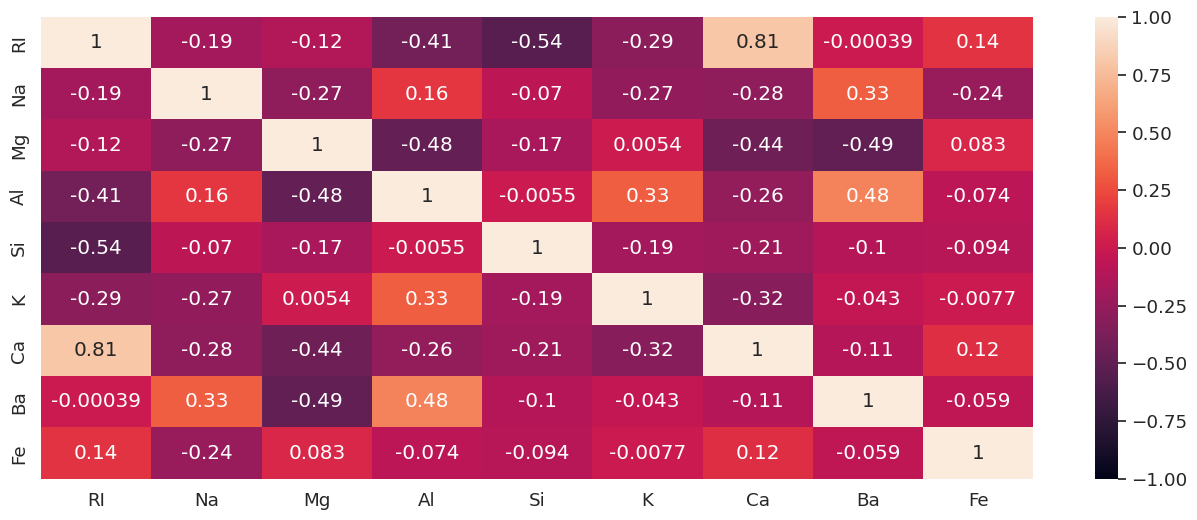

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(data[cols].corr(method='pearson'), vmin=-1, vmax=1, annot=True)

Jak widać największa korelacja pierwiastków jest między  Mg i Ba (-0,49) oraz Al i Mg (-0,48) oraz współczynnik RI i pierwiastka Ca (0,81) i Si(-0,54)

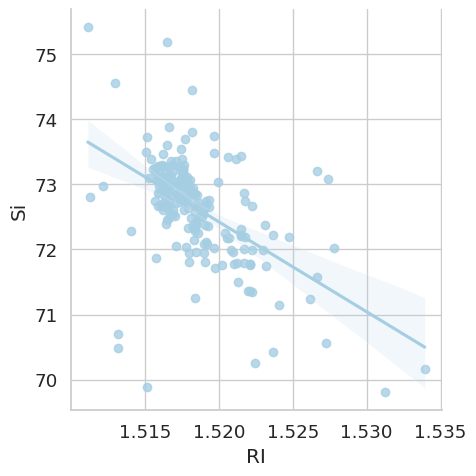

In [ ]:
#Wykres najbardziej skorelowanych zmiennych
sns.lmplot(x='RI', y='Si', data=data)
plt.show()

Na powyższym wykresie korelacji refrakcji z zawartością krzemu widać, że istnieje dominująca korelacja, ale także sporo punktów, które nie wykazują takiej zależności.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


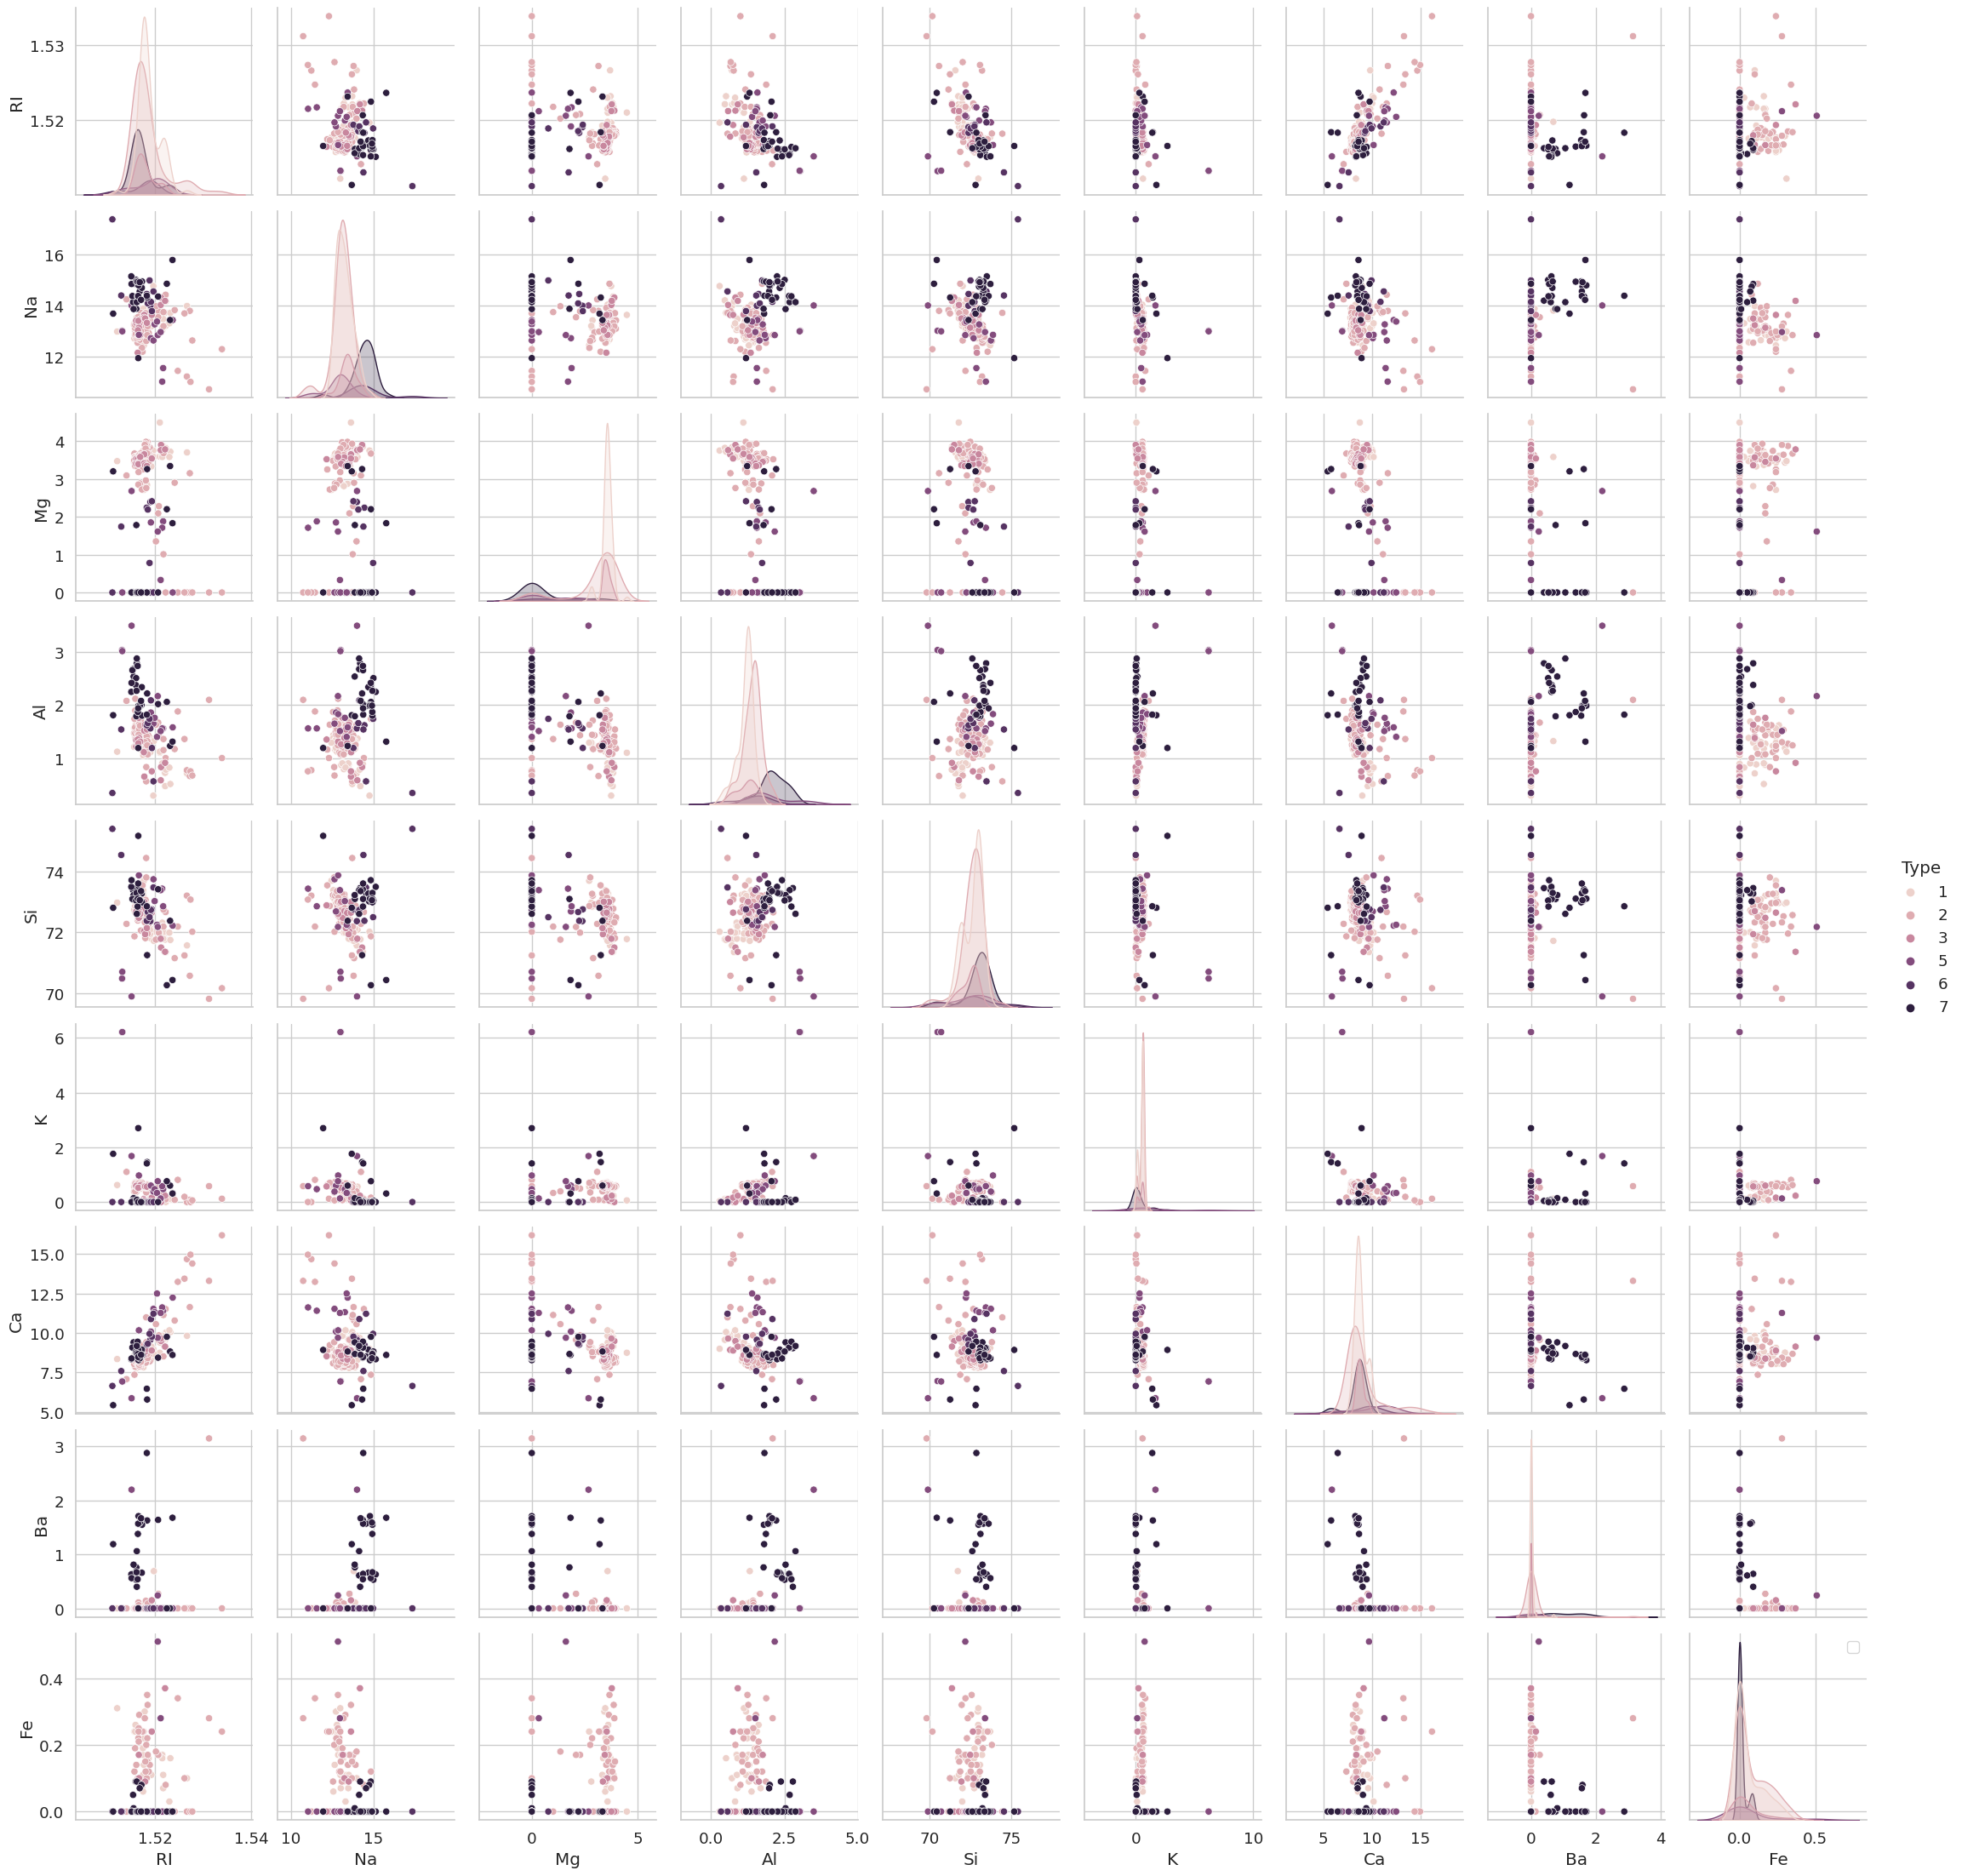

In [69]:
sns.pairplot(data,hue='Type')
plt.legend()
plt.show()

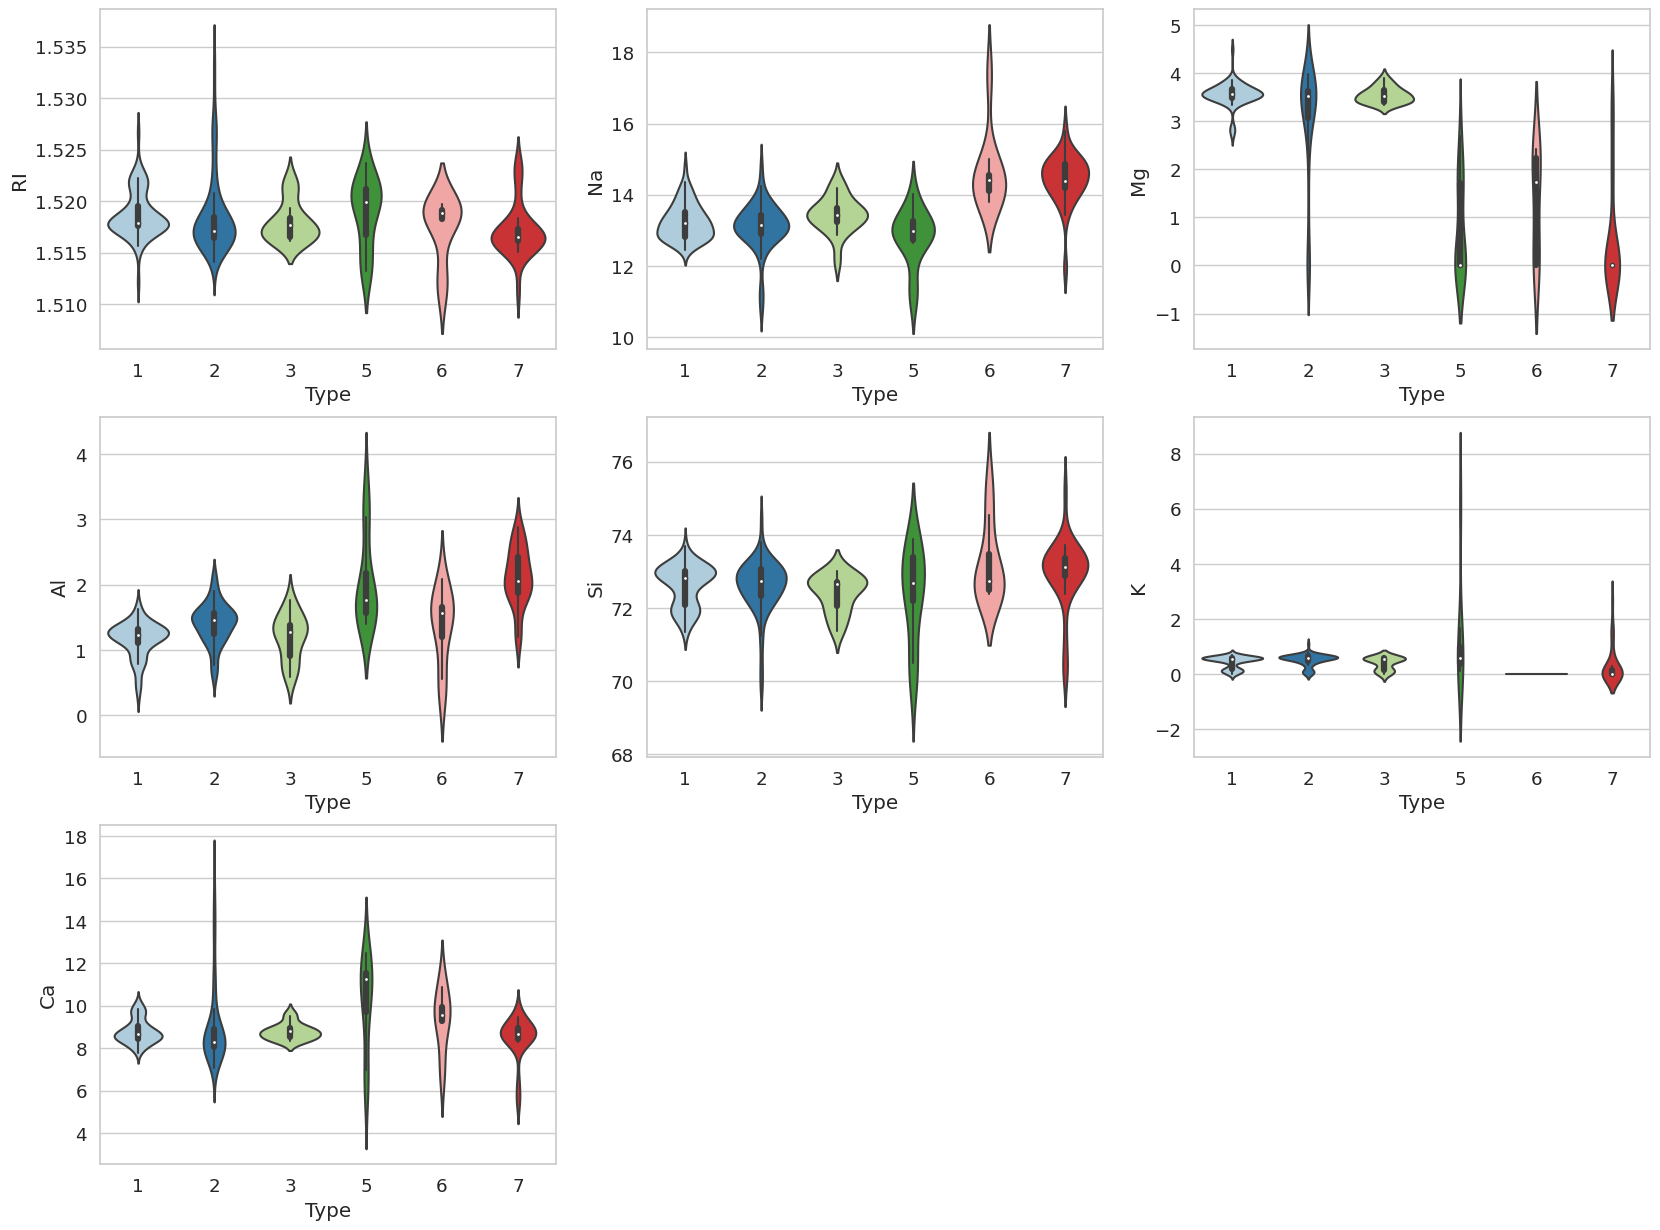

In [ ]:
sns.set(style = "whitegrid", font_scale = 1.2, palette = "Paired")
plt.subplots(figsize = (20, 15))

for i in range(1,8):
    plt.subplot(3, 3, i)
    sns.violinplot(x = 'Type', y = cols[i-1], data = data)

Teraz wykorzystam algorytm najbliższych sąsiadów (KNN) do przewidywania typu szkła na podstawie jego składu.

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop("Type", axis=1) # wybierz wszystkie kolumny oprócz kolumny Type jako dane wejściowe
y = data["Type"] # wybierz kolumnę Type jako dane wyjściowe

# Podzielenie danych na zestaw treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tworzenie i trening modelu k-NN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Ocena modelu na zestawie testowym
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.6511627906976745


Wniosek:
Model k-NN działa całkiem dobrze w tym zbiorze danych, ponieważ osiąga dosyć wysoki poziom dokładności (63,6%) na zestawie testowym. Można dalej próbować zmienić liczbę sąsiadów (parametr n_neighbors) lub inne parametry modelu, aby poprawić jego dokładność.

W celu poprawy dokładności modelu można spróbować:
-Zmianić liczbę sąsiadów (parametru n_neighbors) - może to pomóc uzyskać lepsze dopasowanie do danych,
-Zmienić metrykę - domyślnie używana jest metryka euklidesowa, ale inne metryki, takie jak manhattan, czy minkowski mogą działać lepiej w przypadku danego zbioru,
-Znormalizować dane - jeśli dane wejściowe są w różnych skalach, warto je znormalizować, aby uzyskać lepsze dopasowanie do danych,

Poniższy kod używa tej samej metody, ale zwiększa liczbę sąsiadów oraz używa metryki manhattan:

In [72]:
knn = KNeighborsClassifier(n_neighbors=10, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.6744186046511628


Wniosek:
Jak widać inna metryka i inne parametry poprawiły dokładność tylko minimalnie.

Spójrzmy na dokładność modelu dla różnych wartości parametru n_neighbors:

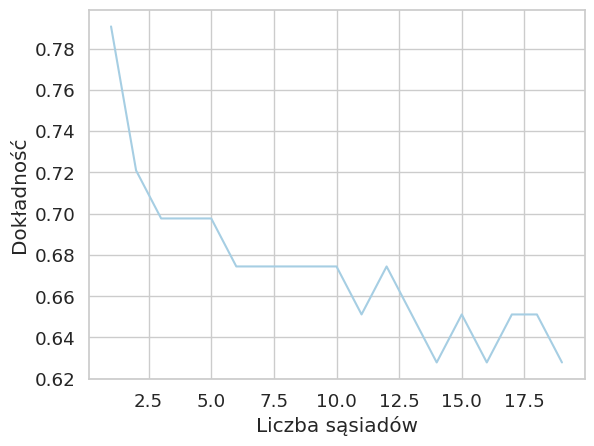

In [74]:
import matplotlib.pyplot as plt

# tworzenie listy z dokładnością dla różnych liczb sąsiadów
accuracies = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=i, metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# wykres zależności dokładności od liczby sąsiadów
plt.plot(range(1, 20), accuracies)
plt.xlabel("Liczba sąsiadów")
plt.ylabel("Dokładność")
plt.show()